In [22]:
import os
import shutil
from pathlib import Path
HOME = os.getcwd()
print(HOME)

/mnt/d/LocalGit/NTNU_mscThesis


In [2]:
# # copy all target file names to a txt list
# with open("obj_image_filenames.txt", "w") as a:
#     for path, subdirs, files in os.walk(r'./datasets/labels_withObj'):
#        for filename in files:
#         #  f = os.path.join(path, filename)
#          a.write((str(filename) + os.linesep).replace(".txt", ".jpg",-1))

In [3]:
# # copy all files from a text list to a desired folder

# fileListingFile = "obj_image_filenames.txt"

# imgto = "datasets/bad"
# imgfrom = "datasets/SeaDronesSee-ODV2-2/train/images"

# with open(fileListingFile, "r") as file:
#     fileNames = [file.strip() for file in file.readlines()]

# fileNames[0]
# for file in fileNames:
#     if os.path.isfile(os.path.join(imgfrom, file)):
#         shutil.copy(os.path.join(imgfrom, file), os.path.join(imgto, file))

In [4]:
# !pip install pybboxes

import cv2
import matplotlib.pyplot as plt
import pybboxes as pbx
import numpy as np

In [5]:
def yolobboxShow(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt"):

    img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension), cv2.COLOR_BGR2RGB)
    dh, dw, _ = img.shape

    fl = open((path+"labels/"+file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (255, 0, 0), 5)

    plt.imshow(img)
    plt.show()

### Function "yolobboxCrop()"
Folder structure

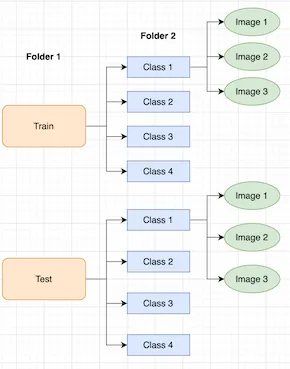

In [41]:

def yolobboxCrop(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt", crop_padding = 0):

    # img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension))
    img = cv2.imread(path+"images/"+file_name+img_extension)
    
    H, W = img.shape[:2]

    fl = open((path+"labels/"+file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for i, dt in enumerate (data):

        # Split string to float
        yoloclass, *yolo_normalized = np.fromstring(dt, dtype=float, sep=' ')[:]    #class, x, y, w, h  as %
        print( yolo_normalized )
        
        x,y,w,h = pbx.convert_bbox(yolo_normalized, from_type="yolo", to_type="coco", image_size=(W,H)) #box_coco = [x,y,w,h]
        yoloclass = int(yoloclass)
        print(yoloclass,x,y,w,h) 
        # print(box_coco) 
        
        
        # print([x, y, w, h])
        cropped_image = img[y:y+h, x:x+w]
        
        # plt.imshow(cropped_image, interpolation='nearest', aspect='auto')     
        # plt.show()
        Path(os.path.join(path , str(yoloclass))).mkdir(parents=True, exist_ok=True)
        cv2.imwrite(os.path.join(path , str(yoloclass), file_name+'_'+str(i)+img_extension), cropped_image)
        
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)   # img, (x,y), (x+w,y+h), (b,g,r)
        
    plt.imshow(img)
    plt.show()

[0.8882, 0.0166, 0.0268, 0.0332]
1 1076 0 33 31
[0.7817, 0.1334, 0.0268, 0.0439]
1 945 104 33 41
[0.5646, 0.2315, 0.0366, 0.0214]
1 672 206 45 20
[0.6118, 0.0096, 0.0154, 0.0129]
0 743 3 19 12
[0.6614, 0.1468, 0.0122, 0.0129]
0 806 131 15 12
[0.7073, 0.0723, 0.0081, 0.0118]
0 865 62 10 11
[0.624, 0.1677, 0.0106, 0.0139]
0 761 150 13 13
[0.611, 0.0954, 0.0122, 0.0129]
0 744 83 15 12
[0.5813, 0.0589, 0.0081, 0.0107]
0 710 50 10 10
[0.5293, 0.0665, 0.013, 0.0193]
0 643 53 16 18
[0.4305, 0.0054, 0.0122, 0.0107]
0 522 0 15 10
[0.3967, 0.0225, 0.0081, 0.0257]
0 483 9 10 24


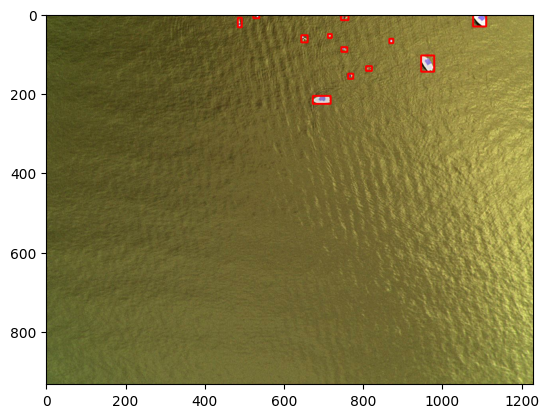

In [42]:
yolobboxCrop(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="9")

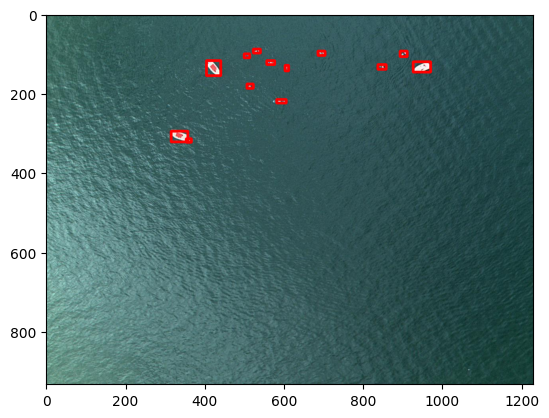

In [8]:
yolobboxShow(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="2")

11


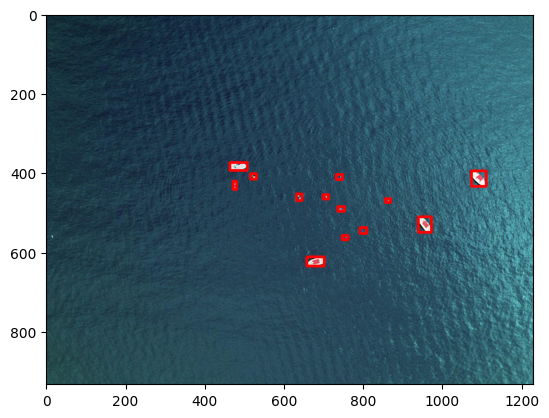

12


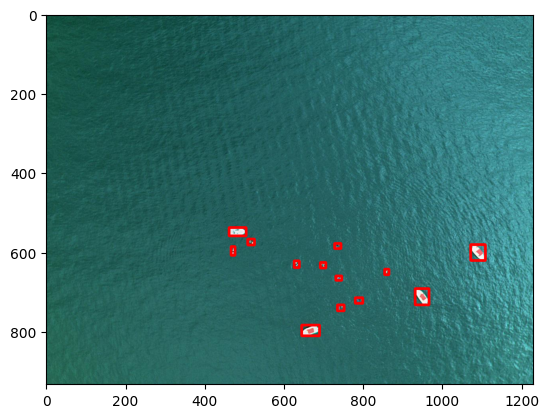

2


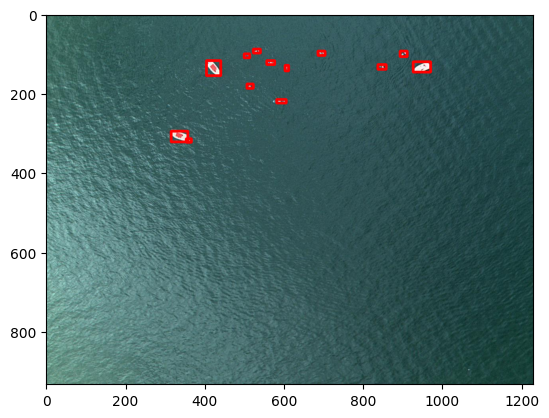

5


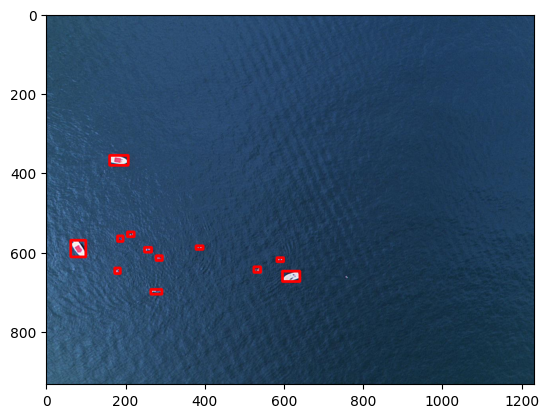

7


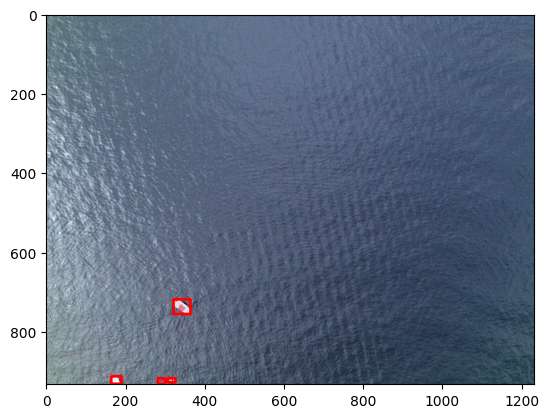

8


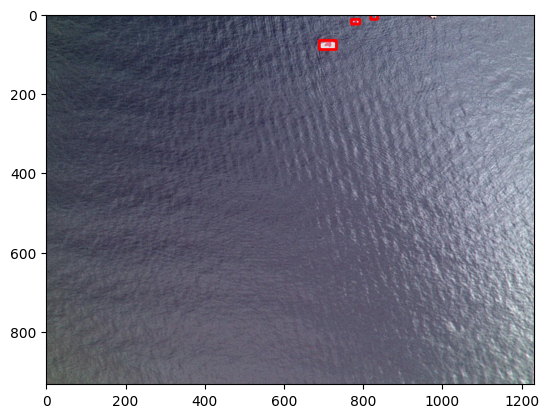

9


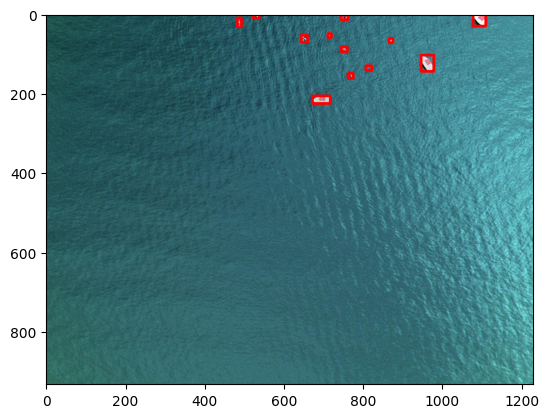

In [9]:
path="./datasets/SeaDronesSee-ODV2-test/train/labels"

# get file names
for path, subdirs, files in os.walk(path):
    for filename in files:
    #  f = os.path.join(path, filename)
        # a.write((str(filename) + os.linesep).replace(".txt", ".jpg",-1))
        print(filename.replace(".txt", "",-1))
        yolobboxShow(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name =filename.replace(".txt", "",-1))